# Model Testing

## Evaluating the train model

In [21]:
#Determine initial MAE, RMSE, R^2 
score = cross_validate(model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)

In [22]:
from statistics import mean
from statistics import stdev
for scores,val in score.items():
    print(scores, mean(val),',',stdev(val))

fit_time 1.5069206396738688 , 0.2773521639545116
score_time 0.010210490226745606 , 0.006703930024165353
test_neg_mean_absolute_error -0.2966075961418151 , 0.0065572433453848075
test_neg_root_mean_squared_error -0.4044414226093398 , 0.015826082255341115
test_r2 0.2232523550975405 , 0.01646724181766527


The MAE with default hyperparameters is -0.2966 (0.0065) (A larger MAE is better and a perfect model has a MAE of 0)<br>
The RMSE with default hyperparameters is -0.4044 (0.015) <br>
The R^2 with default hyperparamaters is 0.22 (0.016) 

## Hyperparamater Tuning

### Modifying number of trees (250, 500, 750, 1000)

In [23]:
#IncreaseTrees to 250
tree_model = XGBRFRegressor(n_estimators=250, subsample=0.9, colsample_bynode=0.2)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 3.369528651237488 , 0.5715286415681479
score_time 0.01350390116373698 , 0.007877065057835838
test_neg_mean_absolute_error -0.2969530731006803 , 0.006671818955812831
test_neg_root_mean_squared_error -0.40480126119174314 , 0.01594525343976888
test_r2 0.22189427608745071 , 0.016074386905472512


In [25]:
#IncreaseTrees to 500
tree_model = XGBRFRegressor(n_estimators=500, subsample=0.9, colsample_bynode=0.2)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 6.853989028930664 , 1.1546803777305592
score_time 0.011919903755187988 , 0.0071349916150257355
test_neg_mean_absolute_error -0.2970520651219047 , 0.00665686832215108
test_neg_root_mean_squared_error -0.40491825023595057 , 0.01600174695830033
test_r2 0.22145577938390515 , 0.01592716305764721


In [104]:
#IncreaseTrees to 750
tree_model = XGBRFRegressor(n_estimators=750, subsample=0.9, colsample_bynode=0.2)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 11.10124781926473 , 1.872167052993025
score_time 0.01916970411936442 , 0.014683190468773512
test_neg_mean_absolute_error -0.297159294033917 , 0.006682114177022371
test_neg_root_mean_squared_error -0.4050694337602153 , 0.016033428217145557
test_r2 0.22087993157844038 , 0.015870063612857255


In [105]:
#IncreaseTrees to 1000
tree_model = XGBRFRegressor(n_estimators=1000, subsample=0.9, colsample_bynode=0.2)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 13.824930866559347 , 2.161970050340501
score_time 0.016809566815694173 , 0.008952345655591049
test_neg_mean_absolute_error -0.2969028305054752 , 0.00667844416210346
test_neg_root_mean_squared_error -0.40475540373413543 , 0.016037490236190666
test_r2 0.2220892756221308 , 0.015874550790229144


Trees = 100: <br>
    MAE = -0.2966 (0.0065), 
    RMSE = -0.4044 (0.015), 
    R^2 = 0.22 (0.016)

Trees = 250: <br>
    MAE = -0.2969 (0.0067), 
    RMSE = -0.405 (0.016), 
    R^2 = 0.22 (0.016)

Trees = 500: <br>
    MAE = -0.29705 (0.0067), 
    RMSE = -0.405 (0.016), 
    R^2 = 0.22 (0.016)
    
Trees = 750: <br>
    MAE = -0.2971 (0.0067), 
    RMSE = -0.405 (0.016), 
    R^2 = 0.22 (0.016)

Trees = 1000: <br>
    MAE = -0.2969 (2.36), 
    RMSE = -0.404 (0.016), 
    R^2 = 0.222 (0.015)

Best performance seems to be at ~750 trees. 

### Modify number of features

In [108]:
#Increase features to 0.4
tree_model = XGBRFRegressor(n_estimators=750, subsample=0.9, colsample_bynode=0.4)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 16.441640218098957 , 3.178806489800374
score_time 0.013590709368387858 , 0.005310349260570838
test_neg_mean_absolute_error -0.28860247257866595 , 0.006477206943834958
test_neg_root_mean_squared_error -0.3943900950762257 , 0.01599204137025876
test_r2 0.26134144707617785 , 0.020551304333985113


In [110]:
#Decrease features to 0.1
tree_model = XGBRFRegressor(n_estimators=750, subsample=0.9, colsample_bynode=0.1)
score = cross_validate(tree_model, X_train, y_train, scoring=(['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']), cv=cv, n_jobs=-1)
for scores,val in score.items():
    print(scores, mean(val), ',', stdev(val))

fit_time 8.62301425933838 , 1.4969786613858675
score_time 0.019014946619669595 , 0.01550398341394227
test_neg_mean_absolute_error -0.30696239300818506 , 0.007323646144693468
test_neg_root_mean_squared_error -0.4173499346906456 , 0.016167679255095473
test_r2 0.17295347768702332 , 0.012138368985627096


Features = 0.1: <br>
    MAE = -0.3069 (0.0073), 
    RMSE = -0.4173 (0.016), 
    R^2 = 0.173 (0.012)
    
Features = 0.2: <br>
    MAE = -0.2971 (0.0067), 
    RMSE = -0.405 (0.016), 
    R^2 = 0.22 (0.016)

Features = 0.4: <br>
    MAE = -0.2886 (0.0064), 
    RMSE = -0.394 (0.01599), 
    R^2 = 0.2613 (0.02055)
    
Performance has different effects on MAE/RMSE and R^2. As features decreased, MAE increases, while R^2 decreases. Features will be maintained at 0.1.

## Building & Testing the predictive model after hyperparamater tuning

In [30]:
final_model = XGBRFRegressor(n_estimators=750, subsample=0.9, colsample_bynode=0.1)
final_model.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.1, colsample_bytree=1,
               enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=750, n_jobs=12,
               num_parallel_tree=750, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, subsample=0.9, tree_method='exact',
               validate_parameters=1, verbosity=None)

In [32]:
y_pred = final_model.predict(X_test)
y_pred

array([0.63842845, 0.83766073, 0.96483827, ..., 0.59440964, 0.58628273,
       0.5319548 ], dtype=float32)

In [33]:
y_test = y_test.squeeze()
y_test

3400     0.563651
12517    1.737818
3514     2.018809
2825     0.195712
12812    0.440138
           ...   
677      0.217086
182      0.791695
2309     0.078246
8697     0.281475
3086     0.128357
Name: Number of outpatient emergency department visits per 1000 long-stay resident days, Length: 1984, dtype: float64

In [34]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

,Actual,Predicted
3400,0.563651,0.638428
12517,1.737818,0.837661
3514,2.018809,0.964838
2825,0.195712,0.466432
12812,0.440138,0.502597
...,...,...
677,0.217086,0.666120
182,0.791695,0.832545
2309,0.078246,0.594410
8697,0.281475,0.586283


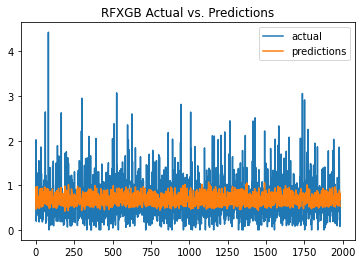

In [35]:
#Visualizing the actual versus predicted values
xax = range(len(y_test))
plt.plot(xax, y_test, label='actual')
plt.plot(xax, y_pred, label='predictions')
plt.title("RFXGB Actual vs. Predictions")
plt.legend()
plt.show()